In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv('Medicine_Details.csv')

In [16]:
df.head()

,Medicine Name,Composition,Uses,Side_effects,Image URL,Manufacturer,Excellent Review %,Average Review %,Poor Review %
0,Avastin 400mg Injection,Bevacizumab (400mg),Cancer of colon and rectum Non-small cell lun...,Rectal bleeding Taste change Headache Noseblee...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Roche Products India Pvt Ltd,22,56,22
1,Augmentin 625 Duo Tablet,Amoxycillin (500mg) + Clavulanic Acid (125mg),Treatment of Bacterial infections,Vomiting Nausea Diarrhea Mucocutaneous candidi...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glaxo SmithKline Pharmaceuticals Ltd,47,35,18
2,Azithral 500 Tablet,Azithromycin (500mg),Treatment of Bacterial infections,Nausea Abdominal pain Diarrhea,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Alembic Pharmaceuticals Ltd,39,40,21
3,Ascoril LS Syrup,Ambroxol (30mg/5ml) + Levosalbutamol (1mg/5ml)...,Treatment of Cough with mucus,Nausea Vomiting Diarrhea Upset stomach Stomach...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glenmark Pharmaceuticals Ltd,24,41,35
4,Aciloc 150 Tablet,Ranitidine (150mg),Treatment of Gastroesophageal reflux disease (...,Headache Diarrhea Gastrointestinal disturbance,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Cadila Pharmaceuticals Ltd,34,37,29


In [20]:
df.isnull().sum()

Medicine Name         0
Composition           0
Uses                  0
Side_effects          0
Image URL             0
Manufacturer          0
Excellent Review %    0
Average Review %      0
Poor Review %         0
dtype: int64

In [24]:
df.describe()

,Excellent Review %,Average Review %,Poor Review %
count,11825.000000,11825.000000,11825.000000
mean,38.516025,35.756364,25.727611
std,25.225343,18.268134,23.991985
min,0.000000,0.000000,0.000000
25%,22.000000,27.000000,0.000000
50%,34.000000,35.000000,22.000000
75%,51.000000,47.000000,35.000000
max,100.000000,88.000000,100.000000


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11825 entries, 0 to 11824
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Medicine Name       11825 non-null  object
 1   Composition         11825 non-null  object
 2   Uses                11825 non-null  object
 3   Side_effects        11825 non-null  object
 4   Image URL           11825 non-null  object
 5   Manufacturer        11825 non-null  object
 6   Excellent Review %  11825 non-null  int64 
 7   Average Review %    11825 non-null  int64 
 8   Poor Review %       11825 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 831.6+ KB


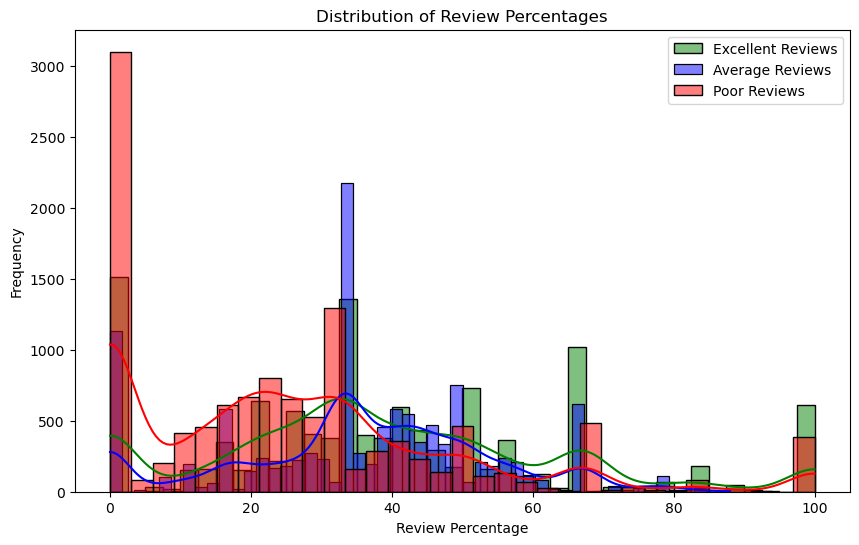

In [34]:
# Plot the distribution of excellent, average, and poor review percentages
plt.figure(figsize=(10,6))
sns.histplot(df['Excellent Review %'], kde=True, color='green', label='Excellent Reviews')
sns.histplot(df['Average Review %'], kde=True, color='blue', label='Average Reviews')
sns.histplot(df['Poor Review %'], kde=True, color='red', label='Poor Reviews')

plt.legend()
plt.title('Distribution of Review Percentages')
plt.xlabel('Review Percentage')
plt.ylabel('Frequency')
plt.show()


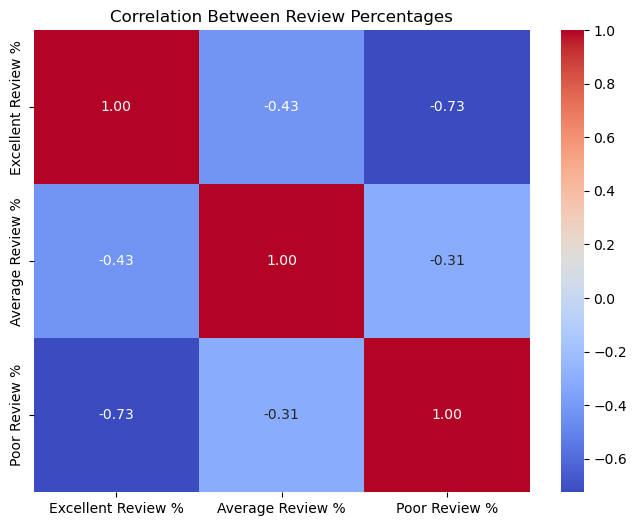

In [36]:
# Plot correlation matrix between review percentages
review_columns = ['Excellent Review %', 'Average Review %', 'Poor Review %']
correlation_matrix = df[review_columns].corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Review Percentages')
plt.show()


In [38]:
# Count the number of drugs with side effects listed
side_effects_count = df['Side_effects'].notnull().sum()
print(f"Number of drugs with side effects listed: {side_effects_count}")


Number of drugs with side effects listed: 11825


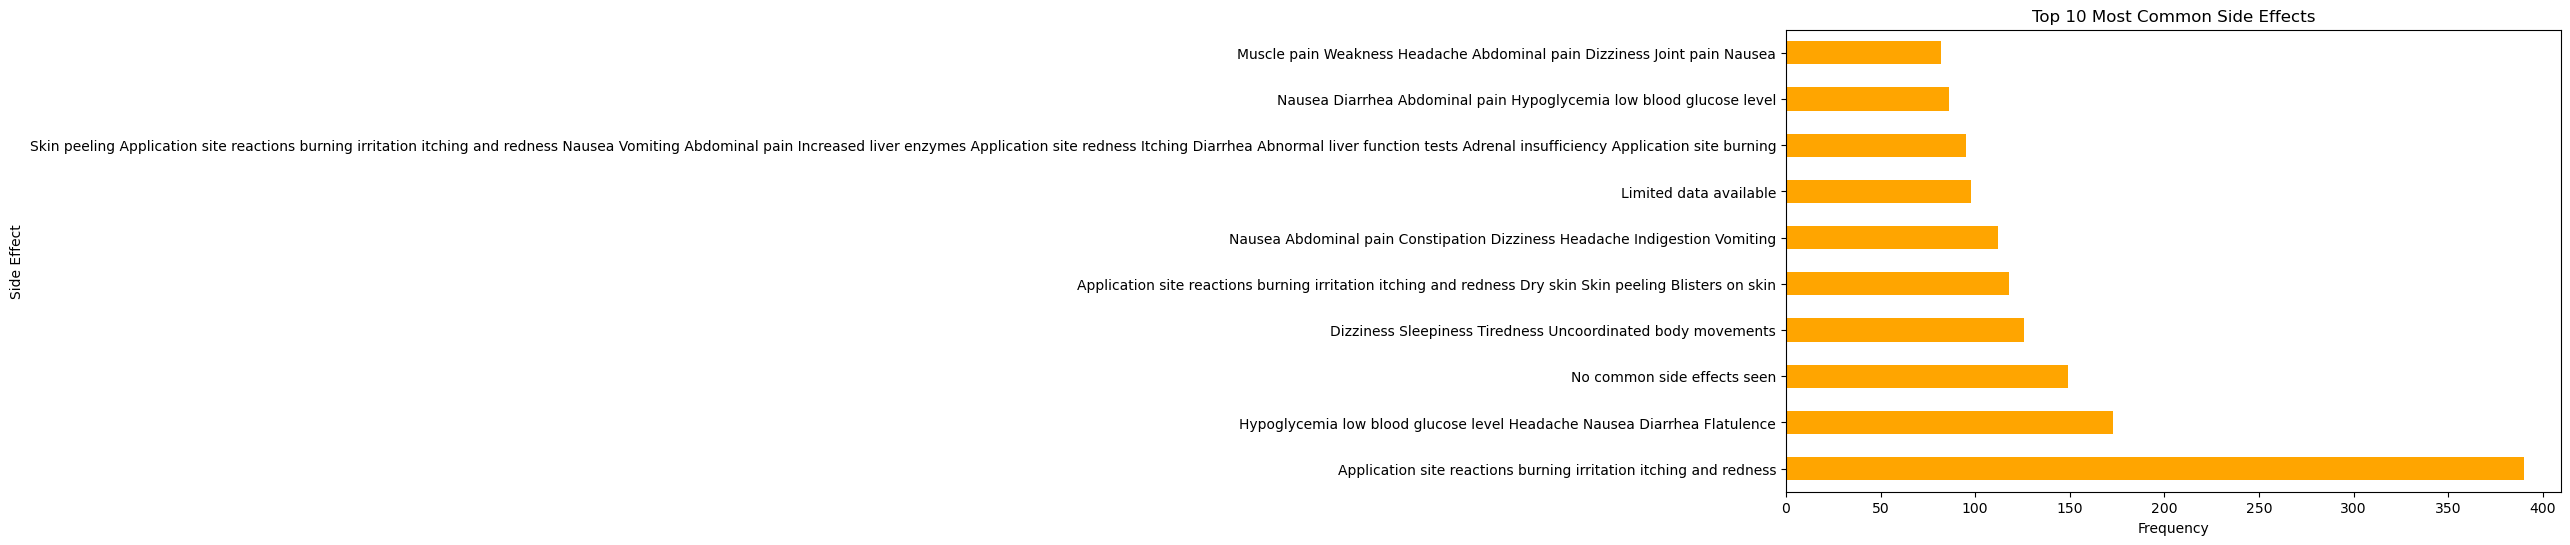

In [42]:
# Split the side effects and count their frequency
side_effects_list = df['Side_effects'].dropna().str.split(',').explode()
side_effects_counts = side_effects_list.value_counts()

# Plot the top 10 most common side effects
plt.figure(figsize=(10,6))
side_effects_counts.head(10).plot(kind='barh', color='orange')
plt.title('Top 10 Most Common Side Effects')
plt.xlabel('Frequency')
plt.ylabel('Side Effect')
plt.show()


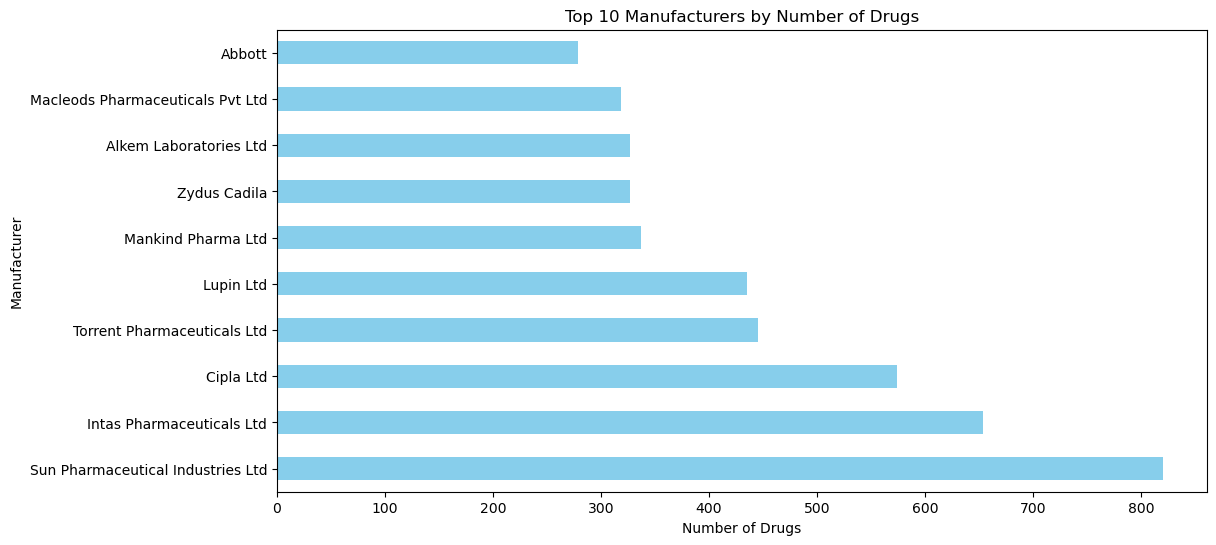

In [44]:
# Count the number of drugs per manufacturer
manufacturer_counts = df['Manufacturer'].value_counts()

# Plot the top 10 manufacturers with the most drugs
plt.figure(figsize=(12,6))
manufacturer_counts.head(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Manufacturers by Number of Drugs')
plt.xlabel('Number of Drugs')
plt.ylabel('Manufacturer')
plt.show()


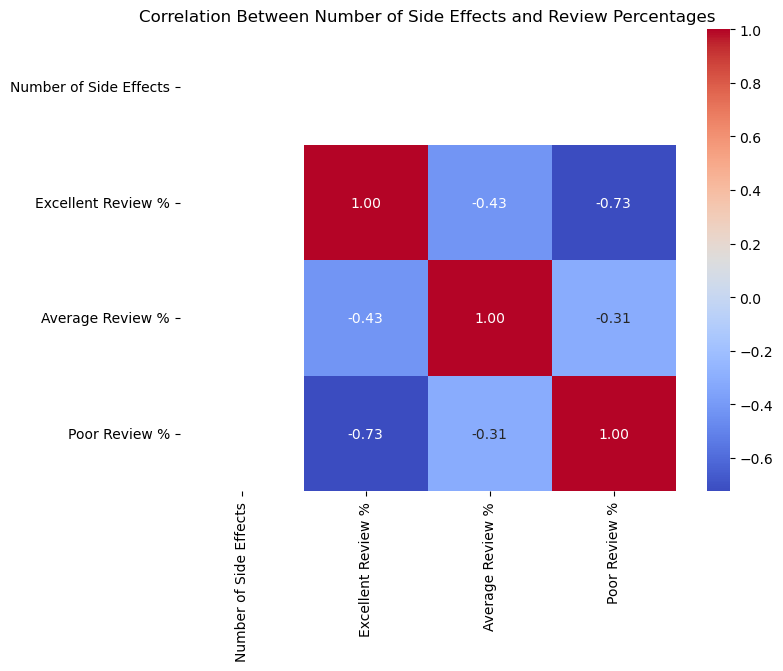

In [48]:
# Calculate correlation between the number of side effects and review percentages
side_effects_reviews_correlation = df[['Number of Side Effects', 'Excellent Review %', 'Average Review %', 'Poor Review %']].corr()

# Plot the correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(side_effects_reviews_correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Number of Side Effects and Review Percentages')
plt.show()


**Conclusion**

- **Review Trends**: Most drugs receive high excellent reviews, with fewer poor reviews.
- **Side Effects**: Drugs with more side effects tend to have lower excellent reviews.
- **Review Correlations**: Negative correlation between excellent and poor reviews.
- **Side Effects and User Ratings**: Fewer side effects often result in higher user ratings.
- **Common Side Effects**: Nausea, headache, and dizziness are common, negatively affecting reviews.
- **Manufacturer Insights**: Some manufacturers have better reviews, while others have mixed performance.
- **Key Insight**: Reducing side effects can improve user satisfaction and drug ratings.
- **Recommendation**: Focus on minimizing side effects for better reviews.